# Predicting Term Deposit Subscription by a client

In [2]:
# Import basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#
# Import label encoder, chi2, model selection
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#
# Import Model and scores
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.svm import SVC
#

In [3]:
# Loading DataSet:

dff = pd.read_csv(r"C:\Users\DONMETHIL\Downloads\Xudemy\Z-ML\bank-additional.csv",header=None)
# Header = None, providing the dataset without the heading:

In [4]:
dff

,0
0,"age;""job"";""marital"";""education"";""default"";""hou..."
1,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
2,"57;""services"";""married"";""high.school"";""unknown..."
3,"37;""services"";""married"";""high.school"";""no"";""ye..."
4,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
...,...
41184,"73;""retired"";""married"";""professional.course"";""..."
41185,"46;""blue-collar"";""married"";""professional.cours..."
41186,"56;""retired"";""married"";""university.degree"";""no..."
41187,"44;""technician"";""married"";""professional.course..."


In [ ]:
# Exploratory Data Analysis & Feature Engineering (EDA & FE):
#
dff = dff[0].str.split(';', expand = True)

In [6]:
dff.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
1,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""


In [7]:
#
dff.columns=dff.iloc[0]

dff.head()

,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
0,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
1,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""


In [8]:
#
df1 = dff
df1.head()

,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
0,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
1,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""


In [9]:
df1 = df1.drop([0]) # deleting the 1st row(0)

In [10]:
df1.head()

,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
1,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
5,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""


In [11]:
# Data types:

df1.isnull().sum()

0
age                 0
"job"               0
"marital"           0
"education"         0
"default"           0
"housing"           0
"loan"              0
"contact"           0
"month"             0
"day_of_week"       0
"duration"          0
"campaign"          0
"pdays"             0
"previous"          0
"poutcome"          0
"emp.var.rate"      0
"cons.price.idx"    0
"cons.conf.idx"     0
"euribor3m"         0
"nr.employed"       0
"y"                 0
dtype: int64

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 1 to 41188
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               41188 non-null  object
 1   "job"             41188 non-null  object
 2   "marital"         41188 non-null  object
 3   "education"       41188 non-null  object
 4   "default"         41188 non-null  object
 5   "housing"         41188 non-null  object
 6   "loan"            41188 non-null  object
 7   "contact"         41188 non-null  object
 8   "month"           41188 non-null  object
 9   "day_of_week"     41188 non-null  object
 10  "duration"        41188 non-null  object
 11  "campaign"        41188 non-null  object
 12  "pdays"           41188 non-null  object
 13  "previous"        41188 non-null  object
 14  "poutcome"        41188 non-null  object
 15  "emp.var.rate"    41188 non-null  object
 16  "cons.price.idx"  41188 non-null  object
 17  "cons.conf.i

In [13]:
df1.dtypes

0
age                 object
"job"               object
"marital"           object
"education"         object
"default"           object
"housing"           object
"loan"              object
"contact"           object
"month"             object
"day_of_week"       object
"duration"          object
"campaign"          object
"pdays"             object
"previous"          object
"poutcome"          object
"emp.var.rate"      object
"cons.price.idx"    object
"cons.conf.idx"     object
"euribor3m"         object
"nr.employed"       object
"y"                 object
dtype: object

In [14]:
# Features Analysis:
# Target variable unique values
df1['"y"'].unique()

array(['"no"', '"yes"'], dtype=object)

In [16]:
df1['"job"'].unique()


array(['"housemaid"', '"services"', '"admin."', '"blue-collar"',
       '"technician"', '"retired"', '"management"', '"unemployed"',
       '"self-employed"', '"unknown"', '"entrepreneur"', '"student"'],
      dtype=object)

In [17]:
# Removing the ("") in column headings:
df1 = df1.rename(columns = {
    '"job"': 'job', 
     '"marital"': 'marital', 
     '"education"': 'education', 
     '"default"': 'default', 
     '"housing"': 'housing',
       '"loan"': 'loan', 
     '"contact"': 'contact', 
     '"month"': 'month', 
     '"day_of_week"': 'day_of_week', 
     '"duration"': 'duration',
       '"campaign"': 'campaign', 
     '"pdays"': 'pdays', 
     '"previous"': 'previous', 
     '"poutcome"': 'poutcome', 
     '"emp.var.rate"': 'emp.var.rate',
       '"cons.price.idx"': 'cons.price.idx', 
     '"cons.conf.idx"': 'cons.conf.idx',
     '"euribor3m"': 'euribor3m', 
     '"nr.employed"': 'nr.employed',
       '"y"': 'y'})

In [18]:
print(df1.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object', name=0)


In [19]:
df1['job'].unique()

array(['"housemaid"', '"services"', '"admin."', '"blue-collar"',
       '"technician"', '"retired"', '"management"', '"unemployed"',
       '"self-employed"', '"unknown"', '"entrepreneur"', '"student"'],
      dtype=object)

In [20]:
df1['marital'].unique()

array(['"married"', '"single"', '"divorced"', '"unknown"'], dtype=object)

In [21]:
df1['education'].unique()

array(['"basic.4y"', '"high.school"', '"basic.6y"', '"basic.9y"',
       '"professional.course"', '"unknown"', '"university.degree"',
       '"illiterate"'], dtype=object)

In [22]:
df1['contact'].unique()

array(['"telephone"', '"cellular"'], dtype=object)

In [24]:
##
df1['job'].replace(['"housemaid"', '"services"', '"admin."', '"blue-collar"',
       '"technician"', '"retired"', '"management"', '"unemployed"',
       '"self-employed"', '"unknown"', '"entrepreneur"', '"student"'],['housemaid', 'services', 'admin', 'blue-collar',
       'technician', 'retired', 'management', 'unemployed',
       'self-employed', 'unknown', 'entrepreneur', 'student'], inplace=True)
##

df1['marital'].replace(['"married"', '"single"', '"divorced"', '"unknown"'],['married', 'single', 'divorced', 'unknown'], inplace=True)
##

df1['education'].replace(['"basic.4y"', '"high.school"', '"basic.6y"', '"basic.9y"',
       '"professional.course"', '"unknown"', '"university.degree"',
       '"illiterate"'],['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], inplace=True)
##

In [25]:
# 
df1['default'].replace(['"no"', '"unknown"', '"yes"'],['no', 'unknown', 'yes'], inplace=True)
#
df1['housing'].replace(['"no"', '"yes"', '"unknown"'],['no', 'yes', 'unknown'], inplace=True)
#
df1['loan'].replace(['"no"', '"yes"', '"unknown"'],['no', 'yes', 'unknown'], inplace=True)
#
df1['contact'].replace(['"telephone"', '"cellular"'],['telephone', 'cellular'], inplace=True)
#
df1['month'].replace(['"may"', '"jun"', '"jul"', '"aug"', '"oct"', '"nov"', '"dec"','"mar"', '"apr"', '"sep"'],
                     ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec','mar', 'apr', 'sep'], inplace=True)
#
#
df1['day_of_week'].replace(['"mon"', '"tue"', '"wed"', '"thu"', '"fri"'],['mon', 'tue', 'wed', 'thu', 'fri'], inplace=True)
#
df1['poutcome'].replace(['"nonexistent"', '"failure"', '"success"'],['nonexistent', 'failure', 'success'], inplace=True)
#

In [26]:
df1['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [27]:
df1['default'].unique()


array(['no', 'unknown', 'yes'], dtype=object)

In [28]:
df1['housing'].unique()


array(['no', 'yes', 'unknown'], dtype=object)

In [29]:
df1['loan'].unique()


array(['no', 'yes', 'unknown'], dtype=object)

In [30]:
df1['contact'].unique()


array(['telephone', 'cellular'], dtype=object)

In [31]:
df1['month'].unique()


array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [32]:
df1['day_of_week'].unique()


array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [33]:
df1['poutcome'].unique()


array(['nonexistent', 'failure', 'success'], dtype=object)

In [34]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,"""no"""
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,"""no"""
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,"""no"""
4,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,"""no"""
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,"""no"""


In [35]:
# Variable Type conversion:
#
df1.dtypes


0
age               object
job               object
marital           object
education         object
default           object
housing           object
loan              object
contact           object
month             object
day_of_week       object
duration          object
campaign          object
pdays             object
previous          object
poutcome          object
emp.var.rate      object
cons.price.idx    object
cons.conf.idx     object
euribor3m         object
nr.employed       object
y                 object
dtype: object

In [36]:
sdf = df1.copy()

In [37]:
#

sdf["age"] = pd.to_numeric(sdf.age)
sdf["campaign"] = pd.to_numeric(sdf["campaign"])
sdf["pdays"] = pd.to_numeric(sdf.pdays)
sdf["previous"] = pd.to_numeric(sdf.previous)
sdf["emp.var.rate"] = pd.to_numeric(sdf["emp.var.rate"])
sdf["cons.price.idx"] = pd.to_numeric(sdf["cons.price.idx"])
sdf["cons.conf.idx"] = pd.to_numeric(sdf["cons.conf.idx"])
sdf["euribor3m"] = pd.to_numeric(sdf["euribor3m"])
sdf["nr.employed"] = pd.to_numeric(sdf["nr.employed"])

In [38]:
sdf.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [39]:
sdf["age"].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

<Axes: xlabel='age'>

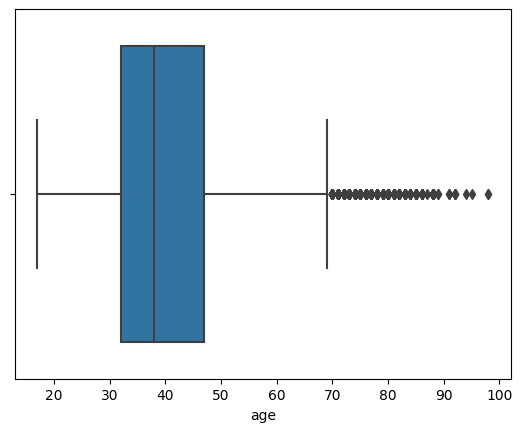

In [40]:
sns.boxplot(data=sdf, x="age", hue="y")


In this box plot we can observe that most of the dataset values age lies in the range of early 20's to 70 and 
25th percentile around 32 and 75th percentile around 48. Median lies at 38 aproximately.
above age 70, we observe some outliers, so we need to visualize further more to come to some conclusion on the same.

In [41]:
sdf[sdf['age']>70].count()

0
age               422
job               422
marital           422
education         422
default           422
housing           422
loan              422
contact           422
month             422
day_of_week       422
duration          422
campaign          422
pdays             422
previous          422
poutcome          422
emp.var.rate      422
cons.price.idx    422
cons.conf.idx     422
euribor3m         422
nr.employed       422
y                 422
dtype: int64

In [42]:
sdf[sdf['age']>70]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27758,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,9,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,"""no"""
27781,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,1,999,1,failure,-1.8,92.843,-50.0,1.687,5099.1,"""no"""
27801,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,"""no"""
27803,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,"""yes"""
27806,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,5,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,"""yes"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40987,84,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,mon,...,4,3,1,success,-1.1,94.601,-49.5,1.000,4963.6,"""no"""
40997,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,"""yes"""
41005,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,1,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,"""yes"""
41184,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


In [53]:
sdf['y'].replace(['"no"', '"yes"'],["no", "yes"], inplace=True)

In [54]:
sdf[(sdf['age']<70) & (sdf['y'] == 'yes')]
# We need to filter whar is the percentage of people above age 70 taken term deposit.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
76,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
84,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
89,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
130,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
140,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41182,37,admin,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [55]:
#
sdf[(sdf['age']>70) & (sdf['y'] == 'yes')]
# By comparing above two calculations we can see considerable percentage of people taken term deposit above age 70, 
# so we can't just drop the values as outliers, because which is very important for marketing campaign analysis

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27803,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27806,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,5,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27811,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27812,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27814,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,7,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40757,77,retired,married,basic.4y,no,yes,no,cellular,sep,thu,...,1,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,yes
40934,71,retired,married,professional.course,no,no,no,cellular,oct,tue,...,1,999,0,nonexistent,-1.1,94.601,-49.5,0.982,4963.6,yes
40997,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes
41005,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,1,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,yes


<Axes: xlabel='age', ylabel='Density'>

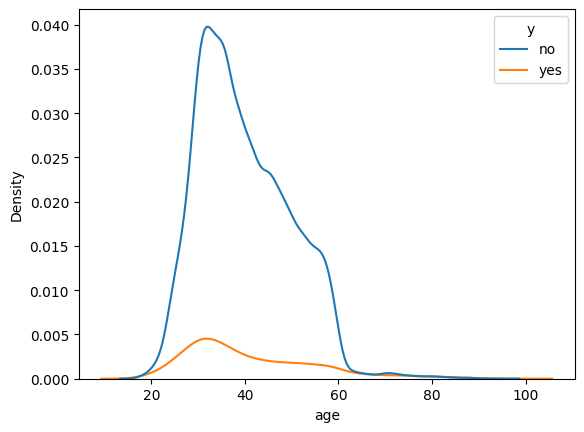

In [56]:
sns.kdeplot(data=sdf, x="age", hue="y")

According to the total number of people contacted through marketing campaign, people taken term deposit is much lower in percentage

Creating subset, analysing the same with age and result, now the box plot clearly shows increased range, and as well as 25th and 75th percentile.

<Axes: xlabel='age'>

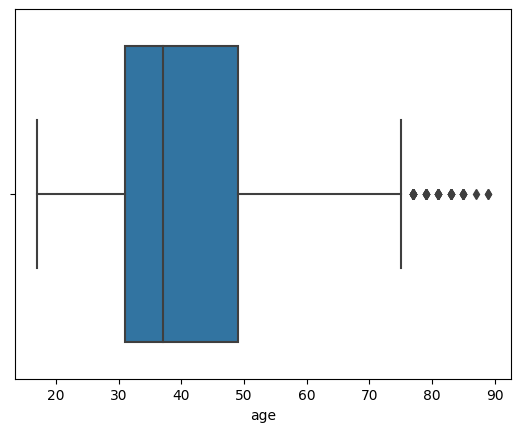

In [57]:
sdf_sub = sdf[(sdf["age"])&(sdf["y"] =='yes')]
#
sns.boxplot(data=sdf_sub, x="age", hue="y")

C:\Users\DONMETHIL\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


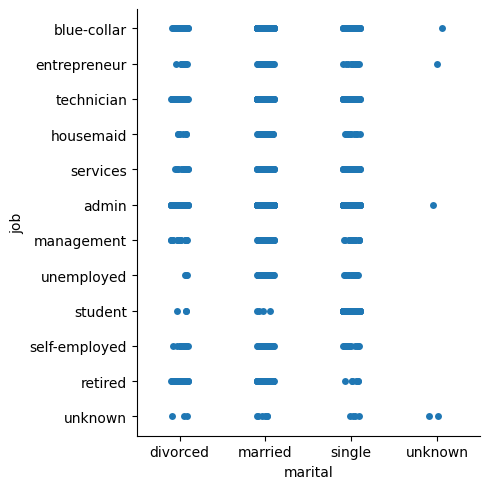

In [58]:
sns.catplot(data=sdf_sub, x="marital", y="job")

In [59]:
sdf[(sdf['age']>80) & (sdf['y'] == 'yes')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27803,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27806,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,5,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27811,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27812,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27814,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,7,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27817,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,3,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27818,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27819,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
28313,82,retired,married,unknown,no,no,no,cellular,apr,wed,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.445,5099.1,yes
30007,85,retired,married,basic.4y,unknown,yes,no,cellular,apr,tue,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,yes


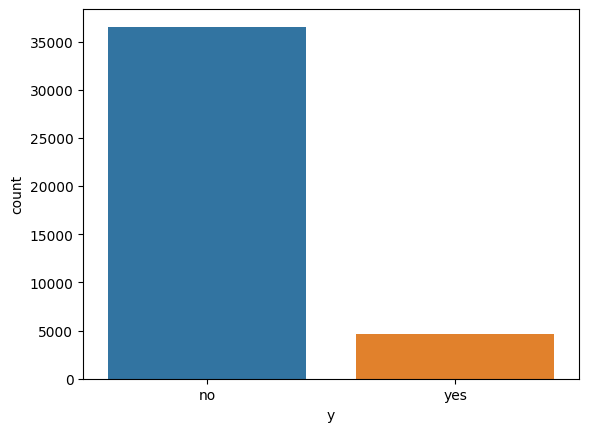

In [60]:
sns.countplot(x="y", data=sdf)


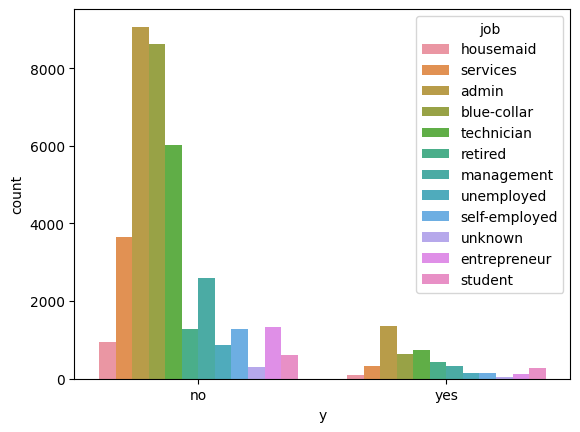

In [61]:
sns.countplot(x="y", hue="job", data=sdf)


<Axes: xlabel='count', ylabel='education'>

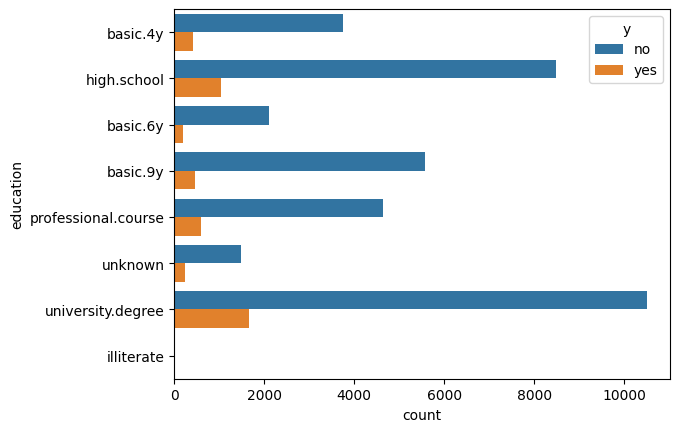

In [62]:
sns.countplot(y="education", hue="y", data=sdf)

<Axes: xlabel='y', ylabel='count'>

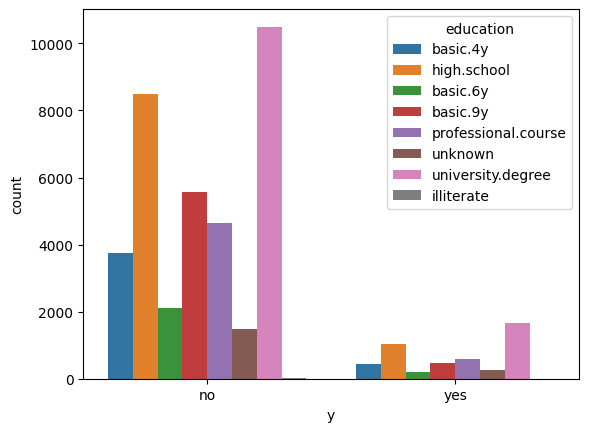

In [63]:
sns.countplot(x="y", hue="education", data=sdf)

<Axes: xlabel='count', ylabel='education'>

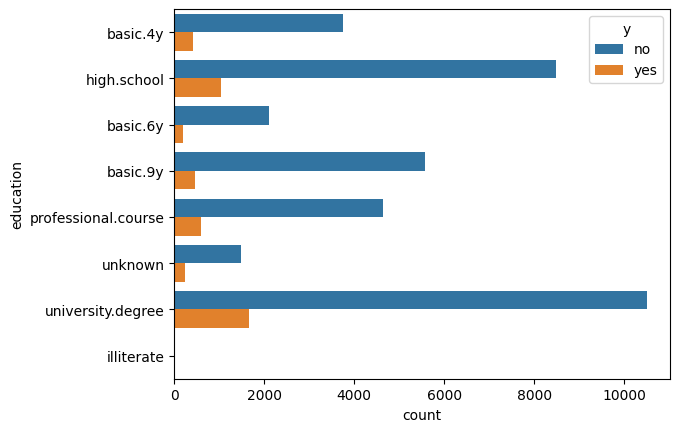

In [64]:
sns.countplot(y="education", hue="y", data=sdf)

In [65]:
sdf_loan_subset = sdf[(sdf['default']=='no') & (sdf['housing'] == 'yes')& (sdf['loan'] == 'yes')]
#
sdf_loan_subset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
19,50,blue-collar,married,basic.9y,no,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
47,57,admin,married,university.degree,no,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
88,39,admin,married,university.degree,no,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
125,32,admin,married,university.degree,no,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
128,31,technician,divorced,professional.course,no,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41084,24,technician,single,university.degree,no,yes,yes,cellular,nov,tue,...,3,6,3,failure,-1.1,94.767,-50.8,1.049,4963.6,yes
41086,51,admin,divorced,high.school,no,yes,yes,cellular,nov,tue,...,2,6,4,failure,-1.1,94.767,-50.8,1.049,4963.6,yes
41099,29,student,single,high.school,no,yes,yes,cellular,nov,thu,...,1,3,3,success,-1.1,94.767,-50.8,1.050,4963.6,yes
41128,61,admin,married,high.school,no,yes,yes,cellular,nov,wed,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.044,4963.6,yes


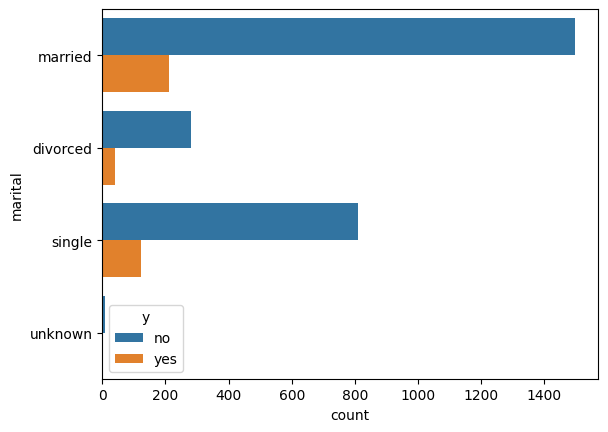

In [66]:
sns.countplot(y="marital", hue="y", data=sdf_loan_subset);


In [67]:
sdf[(sdf['default']=='no') & (sdf['housing'] == 'no')& (sdf['loan'] == 'yes')]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
13,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
26,35,technician,married,university.degree,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
44,57,admin,married,university.degree,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
48,40,blue-collar,married,basic.9y,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41070,51,services,married,high.school,no,no,yes,cellular,nov,mon,...,2,3,4,success,-1.1,94.767,-50.8,1.050,4963.6,no
41081,27,student,single,high.school,no,no,yes,cellular,nov,tue,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.049,4963.6,no
41091,31,admin,single,university.degree,no,no,yes,cellular,nov,wed,...,2,3,6,success,-1.1,94.767,-50.8,1.048,4963.6,no
41112,46,admin,single,university.degree,no,no,yes,cellular,nov,tue,...,1,999,1,failure,-1.1,94.767,-50.8,1.046,4963.6,no


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>,
        <Axes: title={'center': 'cons.price.idx'}>],
       [<Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>,
        <Axes: title={'center': 'nr.employed'}>]], dtype=object)

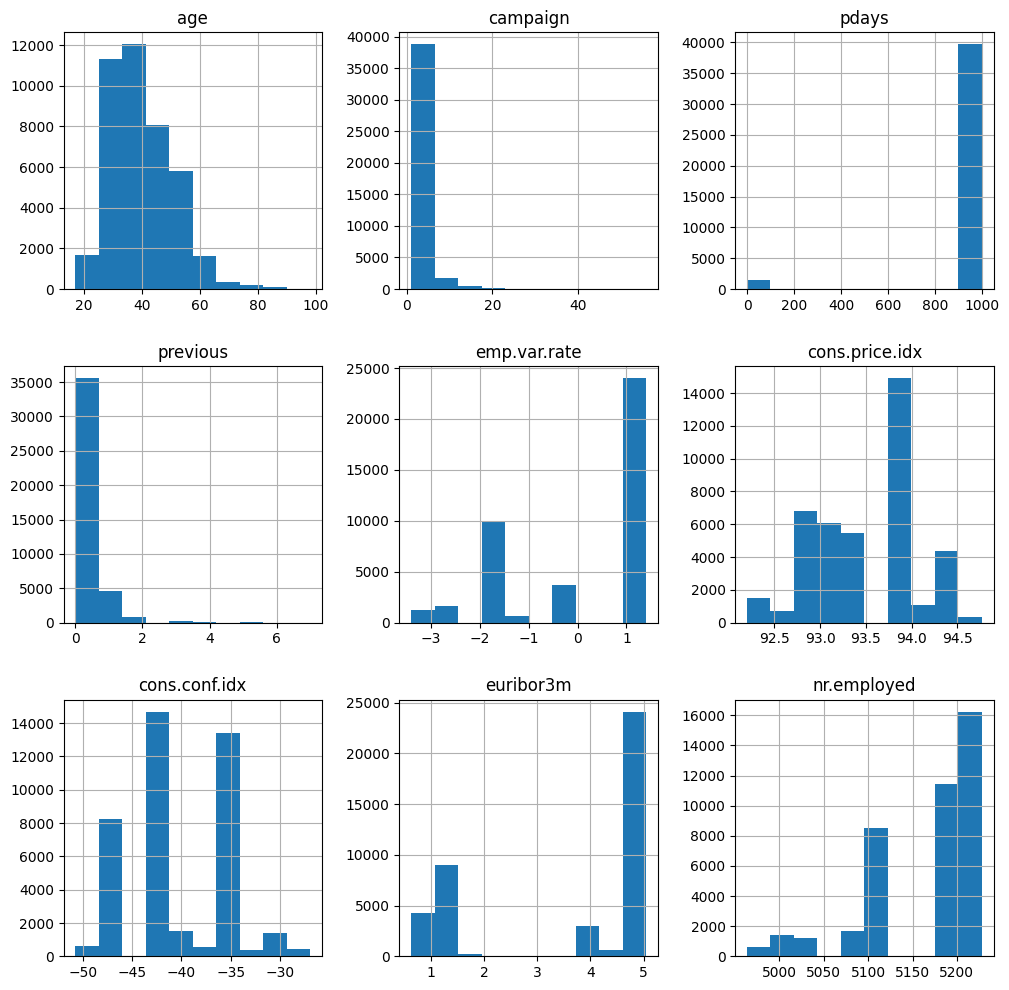

In [68]:
sdf.hist(figsize=(12,12))

In [69]:
sdf_nu_corr = sdf[["age", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]].corr()
#
sdf_nu_corr

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,,,,,,,,,
age,1.000000,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
campaign,0.004594,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


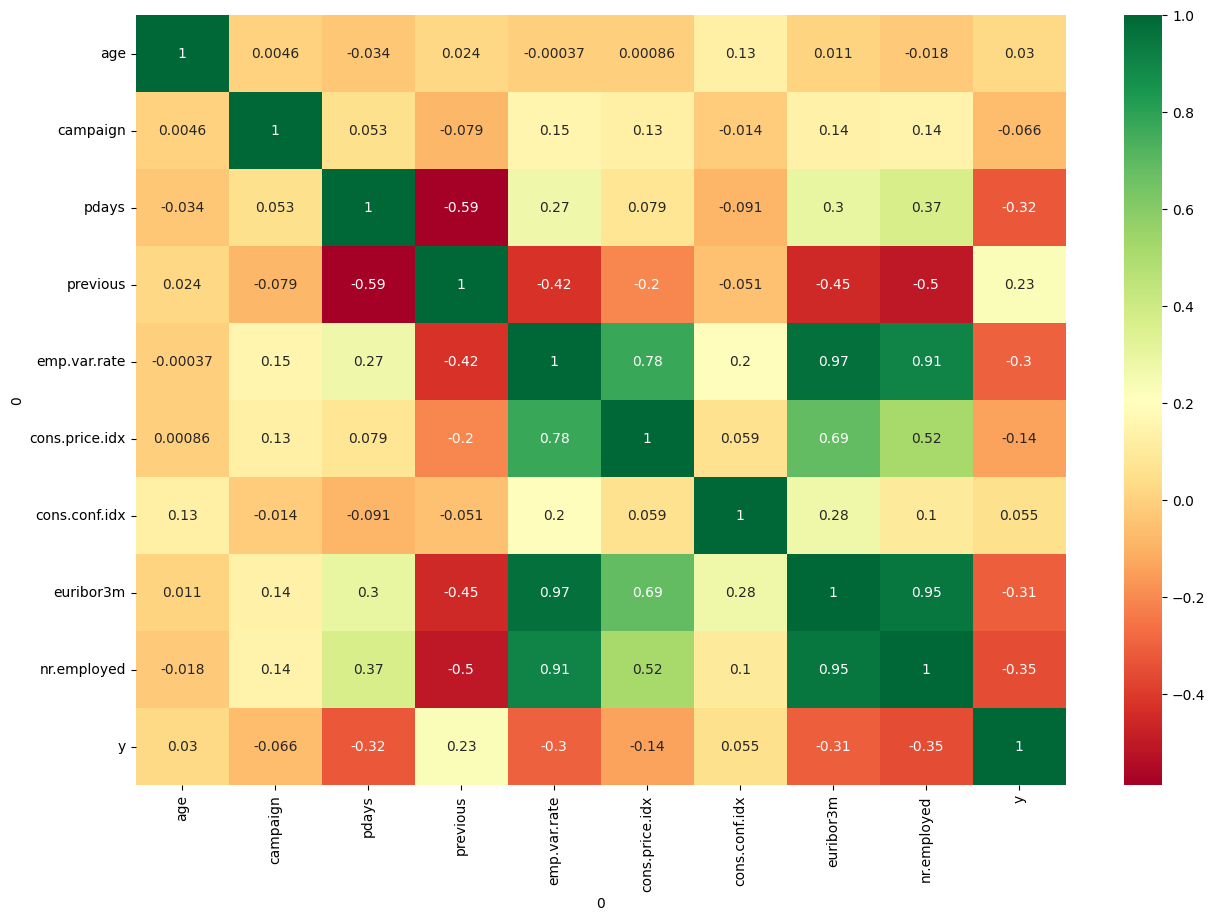

In [96]:
#
fig= plt.figure(figsize=(15,10));
sns.heatmap(sdf_nu_corr, annot=True, cmap="RdYlGn")
plt.show()

In [72]:
# Correlation between categorical features - Chi2 Test:
# 
from scipy.stats import chi2_contingency
from sklearn import preprocessing
#
def is_correlated(x,y):
    ct=pd.crosstab(index=sdf[x], columns= sdf[y])
    chi_sq_result = chi2_contingency(ct,)
    p,x = chi_sq_result[1], "correlated" if chi_sq_result[1] < 0.05 else "not-correlated"
    return p,x

In [73]:
#
print("The p-value and correlation for job:", is_correlated('job','y'))
print("The p-value and correlation for marital:", is_correlated('marital','y'))
print("The p-value and correlation for education:", is_correlated('education','y'))
print("The p-value and correlation for default:", is_correlated('default','y'))
print("The p-value and correlation for housing:", is_correlated('housing','y'))
print("The p-value and correlation for loan:", is_correlated('loan','y'))
print("The p-value and correlation for contact:", is_correlated('contact','y'))
print("The p-value and correlation for day_of_week:", is_correlated('day_of_week','y'))
print("The p-value and correlation for poutcome:", is_correlated('poutcome','y'))

The p-value and correlation for job: (4.189763287563623e-199, 'correlated')
The p-value and correlation for marital: (2.068014648442211e-26, 'correlated')
The p-value and correlation for education: (3.3051890144025054e-38, 'correlated')
The p-value and correlation for default: (5.1619579513916376e-89, 'correlated')
The p-value and correlation for housing: (0.05829447669453452, 'not-correlated')
The p-value and correlation for loan: (0.5786752870441754, 'not-correlated')
The p-value and correlation for contact: (1.5259856523129964e-189, 'correlated')
The p-value and correlation for day_of_week: (2.9584820052785324e-05, 'correlated')
The p-value and correlation for poutcome: (0.0, 'correlated')


In [74]:
sdf[(sdf['default']=='"yes"') & (sdf['housing'] == '"no"')& (sdf['loan'] == '"no"')]
# House and loan is not correlated with the outcome 'y', so we can drop those 2 features


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [75]:
sdf[(sdf['default']=='yes') & (sdf['housing'] == 'yes')& (sdf['loan'] == 'no')]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21582,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no


In [76]:
sdf[(sdf['default']=='yes') & (sdf['housing'] == 'yes')& (sdf['loan'] == 'yes')]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [77]:
# Label Encoding:

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.

sdf['y']= label_encoder.fit_transform(df1['y'])

sdf['y'].unique()

array([0, 1])

In [78]:
sdf.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41184,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41185,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41187,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41188,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0


In [79]:
#
sdf_nu_corr = sdf[["age", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"]].corr()
sdf_nu_corr

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,,,,,,,,,,
age,1.000000,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
campaign,0.004594,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


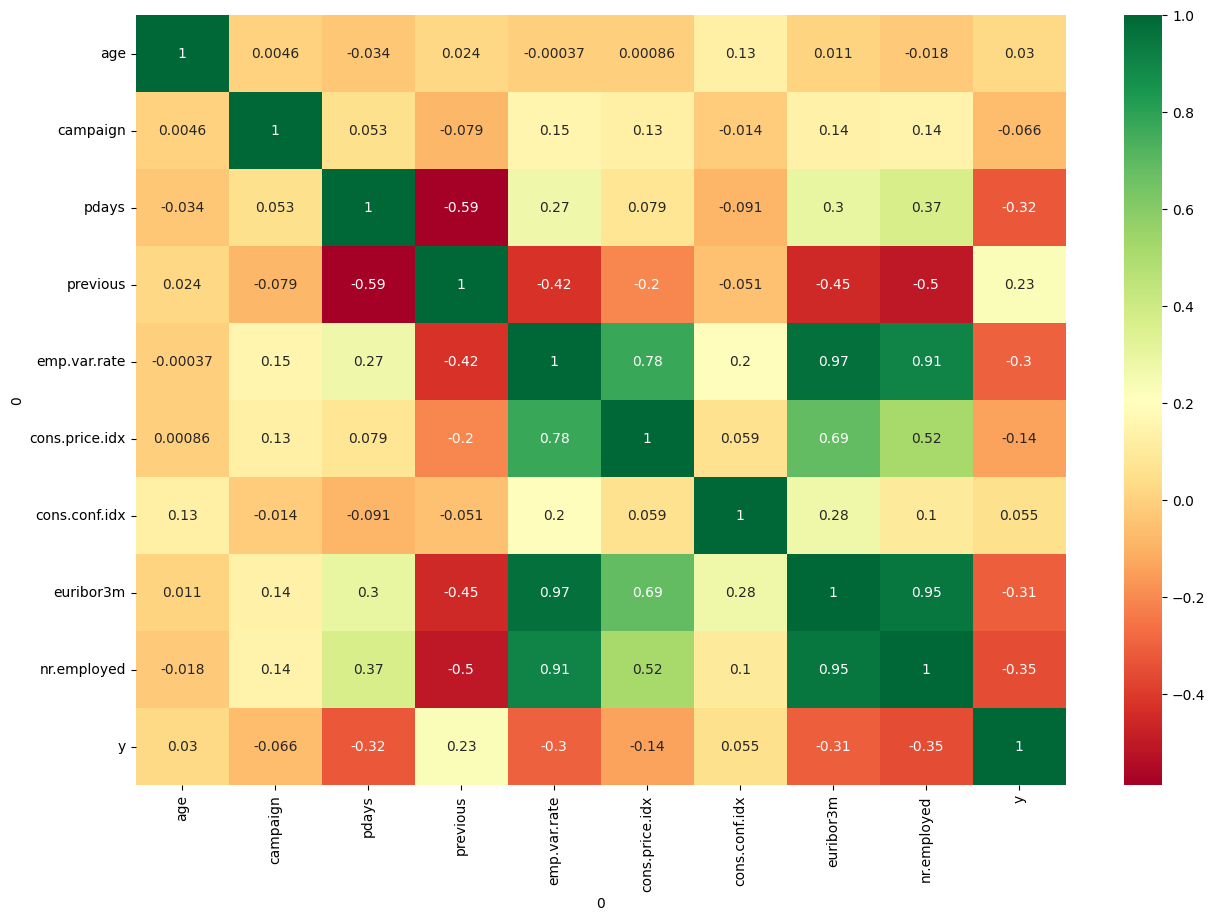

In [95]:
#
fig= plt.figure(figsize=(15,10));
sns.heatmap(sdf_nu_corr, annot=True, cmap="RdYlGn");
plt.show();
# RdYlGn
# BuGn_r

In [81]:
sdf.drop(["age", "housing", "loan"], axis=1, inplace=True)

Dropping features:
Target variable, not depends on these below mentioned columns, so we are droping the same for better calculation, 
1.age, 2. housing, 3. loan

In [82]:
sdf.tail()

,job,marital,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41184,retired,married,professional.course,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41185,blue-collar,married,professional.course,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,retired,married,university.degree,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41187,technician,married,professional.course,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41188,retired,married,professional.course,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0


In [83]:
sdf1 = sdf

In [84]:
# One-hot Encoding :

# To create model and evaluate, we are creating categorical features into numeric one, 
# by using One-hot Encoding for categorical data
#
job_col_du = pd.get_dummies(sdf1['job'], prefix='job_du')

edu_col_du = pd.get_dummies(sdf1['education'], prefix='edu_du')

marital_col_du = pd.get_dummies(sdf1['marital'], prefix='marital_du')

edu_col_du = pd.get_dummies(sdf1['default'], prefix='default_du')

contact_col_du = pd.get_dummies(sdf1['contact'], prefix='contact_du')

month_col_du = pd.get_dummies(sdf1['month'], prefix='month_du')

day_col_du = pd.get_dummies(sdf1['day_of_week'], prefix='day_du')

pout_col_du = pd.get_dummies(sdf1['poutcome'], prefix='pout_du')

In [85]:
sdf1 = pd.concat([sdf1, job_col_du, edu_col_du, marital_col_du, edu_col_du, contact_col_du , month_col_du, day_col_du, pout_col_du], axis=1)


In [86]:
sdf1.drop(["job", "education", "marital", "default", "contact", "month", "day_of_week", "poutcome"], axis=1, inplace=True)


In [87]:
sdf1.head()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_du_oct,month_du_sep,day_du_fri,day_du_mon,day_du_thu,day_du_tue,day_du_wed,pout_du_failure,pout_du_nonexistent,pout_du_success
1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
5,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


# Support Vector Mechine (SVM) - Model

In [88]:
# SVM using Linear Kernal: 

x= sdf1.drop('y',axis=1)
#
y= sdf1['y']
#

In [89]:
# SVM Linear Model Test Size 0.2
#

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model1=SVC(kernel ='linear')

# training set in x, y axis
result1=model1.fit(x_train,y_train)
y_pred1=result1.predict(x_test)

In [90]:
#
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.svm import SVC
#
print("For test size:0.2, Accuracy Of SVM: ", accuracy_score(y_pred1,y_test))
print(classification_report(y_pred1,y_test))

For test size:0.2, Accuracy Of SVM:  0.9019179412478757
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      7681
           1       0.37      0.66      0.48       557

    accuracy                           0.90      8238
   macro avg       0.67      0.79      0.71      8238
weighted avg       0.93      0.90      0.91      8238



In [92]:
# SVM using Polynomial kernal with degree of polynomial = 2

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
model7 = SVC(kernel ='poly', degree = 2)

# training set in x, y axis
result7 = model7.fit(x_train, y_train)
y_pred7=result7.predict(x_test)

In [93]:
#
print("For test size:0.25, Accuracy Of SVM sigmoid kernal: ", accuracy_score(y_pred7,y_test))
print(classification_report(y_pred7,y_test))

For test size:0.25, Accuracy Of SVM sigmoid kernal:  0.8967660483636011
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      9861
           1       0.23      0.62      0.34       436

    accuracy                           0.90     10297
   macro avg       0.61      0.77      0.64     10297
weighted avg       0.95      0.90      0.92     10297



In [ ]:
# # #

Conclusion:

This dataset have more categorical values to address, and the model is design with SVM. 
It is best suitable for categorical features and given high accuracy. 
From the above analysis, we can see 90% accuracy from our model, Default credit, housing loan, 
contact type is not having bigger impact in the output in this dataset but this is also a factor which affect the customer 
to not to take term loan, and we take the effort of the campaign department, which have some considerable amount of impact 
in the result, last call duration indicates that which ever call spoke lesser time in seconds customer do not take term 
deposit, and long gap provided between the followup or call, there is bigger impact in the closing of the product, 
there is high chance of customer take term deposit with some other bank or from different team. 
Followup with customer is very important for the campaign to increase the term loan taking output. 
Concentrating more on the not converted people from the age group between 30 to 60 and salary profession gives improve 
more outcome for the term deposit. There is one more value in many of features not addressed is "unknown" values 
(job, marital, education, default, housing, loan), which can be handled by different methods like interpolate or replace 
from pandas. That can be the future scope of the project which may increase the accuracy further more.